In [1]:
# necessary Imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
sns.set()

In [2]:
#Reading Data
data = pd.read_csv('USA_Housing.csv')
data.head()

Avg. Area Income  Avg.House Age  Avg. Number of Rooms  \
0      79545.458574       5.682861              7.009188   
1      79248.642455       6.002900              6.730821   
2      61287.067179       5.865890              8.512727   
3      63345.240046       7.188236              5.586729   
4      59982.197226       5.040555              7.839388   

   Avg. Number of Bedrooms  Area Population         Price  \
0                     4.09     23086.800503  1.059034e+06   
1                     3.09     40173.072174  1.505891e+06   
2                     5.13     36882.159400  1.058988e+06   
3                     3.26     34310.242831  1.260617e+06   
4                     4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Avg. Area Income         5000 non-null   float64
 1   Avg.House Age            5000 non-null   float64
 2   Avg. Number of Rooms     5000 non-null   float64
 3   Avg. Number of Bedrooms  5000 non-null   float64
 4   Area Population          5000 non-null   float64
 5   Price                    5000 non-null   float64
 6   Address                  5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
data.describe()

Avg. Area Income  Avg.House Age  Avg. Number of Rooms  \
count       5000.000000    5000.000000           5000.000000   
mean       68583.108984       5.977222              6.987792   
std        10657.991214       0.991456              1.005833   
min        17796.631190       2.644304              3.236194   
25%        61480.562388       5.322283              6.299250   
50%        68804.286404       5.970429              7.002902   
75%        75783.338666       6.650808              7.665871   
max       107701.748378       9.519088             10.759588   

       Avg. Number of Bedrooms  Area Population         Price  
count              5000.000000      5000.000000  5.000000e+03  
mean                  3.981330     36163.516039  1.232073e+06  
std                   1.234137      9925.650114  3.531176e+05  
min                   2.000000       172.610686  1.593866e+04  
25%                   3.140000     29403.928702  9.975771e+05  
50%                   4.050000     36199.406689  1.232669e+06  
75%                   4.490000     42861.290769  1.471210e+06  
max                   6.500000     69621.713378  2.469066e+06

In [13]:
#Checking overall profile of data
from ydata_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Checking Null
data.isnull().sum()

Avg. Area Income           0
Avg.House Age              0
Avg. Number of Rooms       0
Avg. Number of Bedrooms    0
Area Population            0
Price                      0
Address                    0
dtype: int64

<AxesSubplot:>

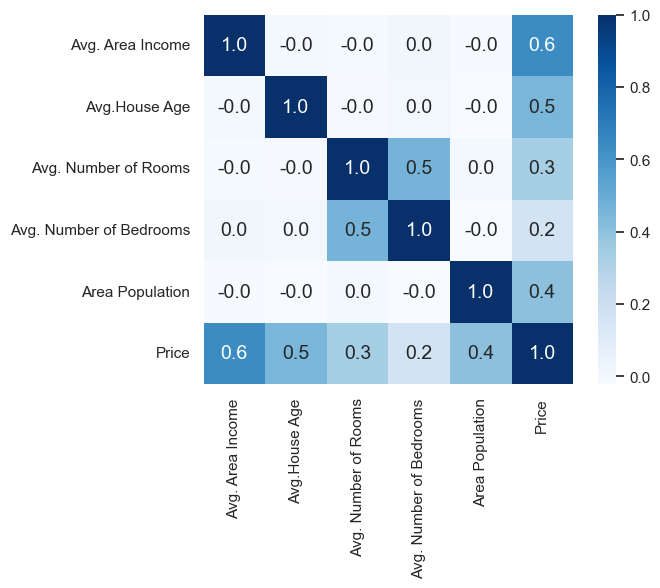

In [6]:
correlation = data.corr()
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f",annot = True, annot_kws={"size": 14}, cmap = "Blues")

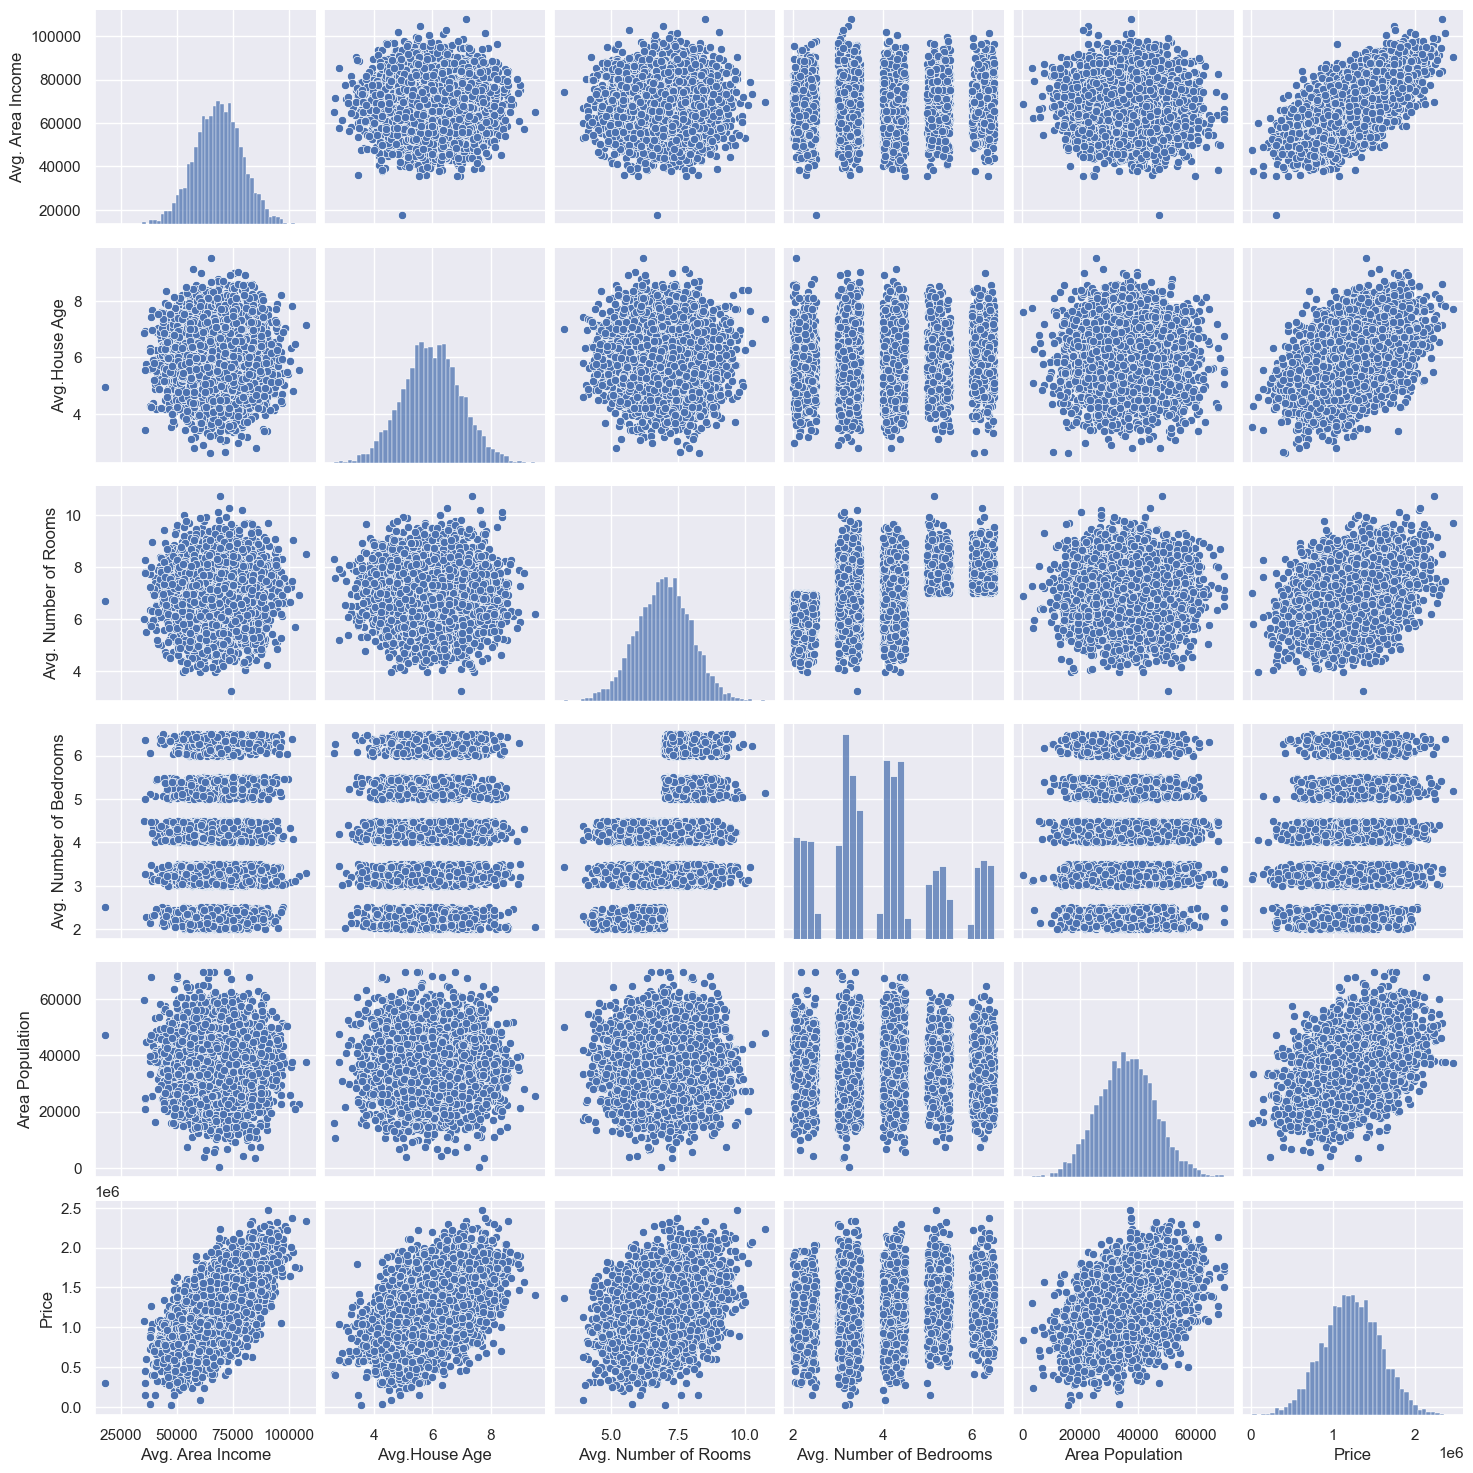

In [7]:
sns.pairplot(data)

In [15]:
y = data['Price']  #Only dependent variable
X =data.drop(columns = ['Price',"Address"])

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

In [17]:
#Creating Linear Regression
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [19]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [20]:
y_predicted = regression.predict(x_train)
y_predicted

array([ 666149.56801299, 1431891.0270858 ,  778891.47491943, ...,
       1171919.3765352 , 1739321.86842384, 1678448.50927354])

In [21]:
regression.score(x_train,y_train)  # R-squared 

0.9166917008986593

In [23]:
 regression.score(x_test,y_test) #R-squared

0.9215905128043769

In [32]:
coeff_df = pd.DataFrame(regression.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income             21.508237
Avg.House Age            166361.339411
Avg. Number of Rooms     121692.340177
Avg. Number of Bedrooms     439.317686
Area Population              15.154667

*# 1 unit increase in Avg. Area Income is associated with an increase of $21.52, keeping all other constant
*# 1 unit increase in Avg. Area House Age is associated with an increase of $164883.2, keeping all other constant
....

In [38]:
#Predictions from our Linear Regression Model
predictions = regression.predict(x_test)  
predictions

array([1039949.50722287, 1337098.41585093, 1053182.67175425, ...,
       1555588.37028935,  989587.90634419,  797996.74430561])

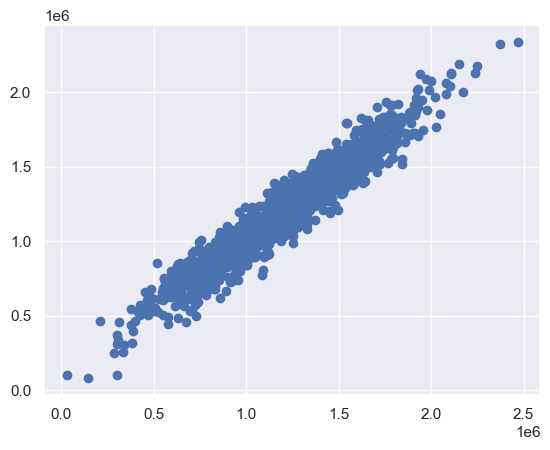

In [39]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in a line form, which means our model has done good predictions.

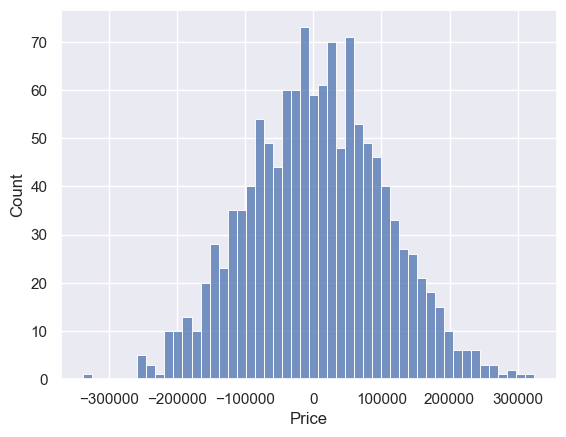

In [49]:
sns.histplot((y_test-predictions),bins=50); 

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

In [52]:
regression.score(x_test,y_test) #R-squared

0.9215905128043769

In [55]:
regression.score(x_train,y_train)  # R-squared 

0.9166917008986593

In [57]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
adj_r2(x_train,y_train)

0.916580445157338

Our Training and test data performs almost same result with good predicition score.